In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Uniform

In [2]:
components = np.array([1,2,3,4,5,6,7,8])
n_frames = np.array([ 30520,  61041, 152604, 305209]) 
uni_new_float64 = np.empty((len(components),len(n_frames),2))
uni_new_float32 = np.empty((len(components),len(n_frames),2))
uni_old_float64 = np.empty((len(components),len(n_frames),2))
import os
path = "../uniform/"
for i, component in enumerate(components):
    file_name = path + "float64/v2.0_timing_uniform_torch.float64_" + str(component) + ".cpu.dat" 
    uni_new_float64[i] = np.loadtxt(file_name)[:,1:3]
    file_name = path + "float32/v2.0_timing_uniform_torch.float32_" + str(component) + ".cpu.dat" 
    uni_new_float32[i] = np.loadtxt(file_name)[:,1:3]
    file_name = path + "float64_old/v1.7_timing_uniform_torch.float64_" + str(component) + ".cpu.dat" 
    uni_old_float64[i] = np.loadtxt(file_name)[:,1:3]

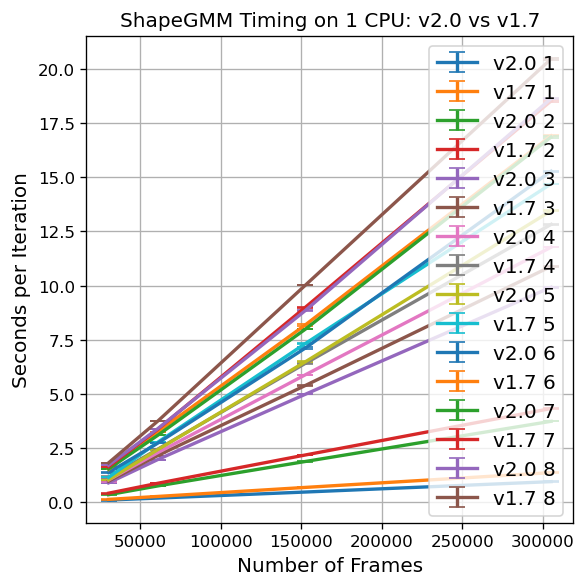

In [3]:
fontsize = 12
plt.figure(figsize=(5,5),dpi=120)
for i, component in enumerate(components):
    label = "v2.0 " + str(component)
    plt.errorbar(n_frames, uni_new_float64[i,:,0]/30,yerr=uni_new_float64[i,:,1]/30, capsize=5, label=label, lw=2)
    label = "v1.7 " + str(component)
    plt.errorbar(n_frames, uni_old_float64[i,:,0]/30,yerr=uni_new_float64[i,:,1]/30, capsize=5, label=label, lw=2)
plt.grid(True)
plt.legend(fontsize=fontsize)
plt.xlabel("Number of Frames",fontsize=fontsize)
plt.ylabel("Seconds per Iteration", fontsize=fontsize)
plt.title("ShapeGMM Timing on 1 CPU: v2.0 vs v1.7", fontsize=fontsize)
plt.tight_layout()
plt.show();

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_4518/1150303116.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(components))  # consistent colormap


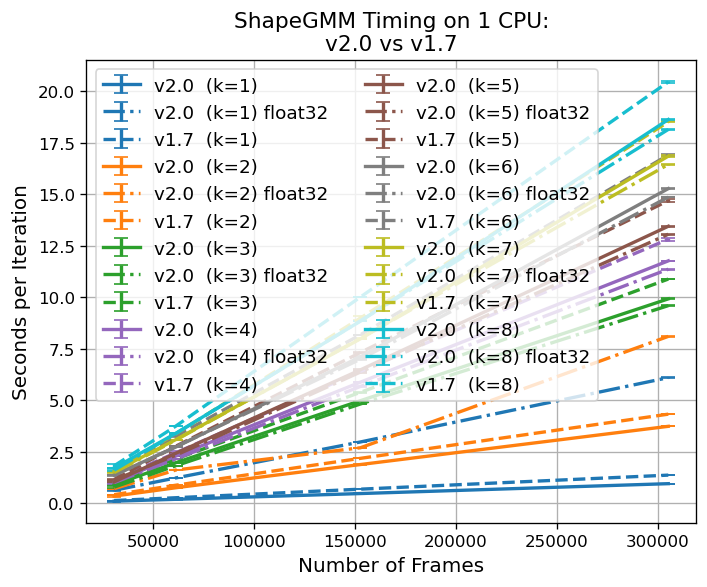

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# dummy inputs (replace with your real arrays)
# n_frames = np.array([...])
# uni_new_float64 = np.array([...])
# uni_old_float64 = np.array([...])
# components = list(range(1, 9))

fontsize = 12
colors = cm.get_cmap('tab10', len(components))  # consistent colormap

plt.figure(figsize=(6, 5), dpi=120)

for i, component in enumerate(components):
    c = colors(i)
    # v2.0: solid
    plt.errorbar(
        n_frames,
        uni_new_float64[i,:,0]/30,
        yerr=uni_new_float64[i,:,1]/30 ,
        label=f"v2.0  (k={component})",
        color=c,
        linestyle='-',
        linewidth=2,
        capsize=4
    )
    # v2.0: solid float32
    plt.errorbar(
        n_frames,
        uni_new_float32[i,:,0]/30,
        yerr=uni_new_float32[i,:,1]/30 ,
        label=f"v2.0  (k={component}) float32",
        color=c,
        linestyle='-.',
        linewidth=2,
        capsize=4
    )
    # v1.7: dashed
    plt.errorbar(
        n_frames,
        uni_old_float64[i,:,0]/30,
        yerr=uni_old_float64[i,:,1]/30,
        label=f"v1.7  (k={component})",
        color=c,
        linestyle='--',
        linewidth=2,
        capsize=4
    )

plt.grid(True)
plt.xlabel("Number of Frames", fontsize=fontsize)
plt.ylabel("Seconds per Iteration", fontsize=fontsize)
plt.title("ShapeGMM Timing on 1 CPU:\nv2.0 vs v1.7", fontsize=fontsize+1)
plt.legend(fontsize=fontsize-1, loc='upper left', ncol=2)
plt.tight_layout()
plt.show();

In [6]:
from scipy.stats import linregress
import numpy as np

n_components_list = np.array(components)
slopes_v20 = []
errors_v20 = []
slopes_v20_float32 = []
errors_v20_float32 = []
slopes_v17 = []
errors_v17 = []

for i in range(len(n_components_list)):
    # Version 2.0
    y_v20 = uni_new_float64[i,:,0]
    slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v20)
    slopes_v20.append(slope)
    errors_v20.append(stderr)

    # Version 2.0
    y_v20_float32 = uni_new_float32[i,:,0]
    slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v20_float32)
    slopes_v20_float32.append(slope)
    errors_v20_float32.append(stderr)
    
    # Version 1.7
    y_v17 = uni_old_float64[i,:,0]
    slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v17)
    slopes_v17.append(slope)
    errors_v17.append(stderr)

slopes_v20 = np.array(slopes_v20)
errors_v20 = np.array(errors_v20)
slopes_v20_float32 = np.array(slopes_v20_float32)
errors_v20_float32 = np.array(errors_v20_float32)
slopes_v17 = np.array(slopes_v17)
errors_v17 = np.array(errors_v17)

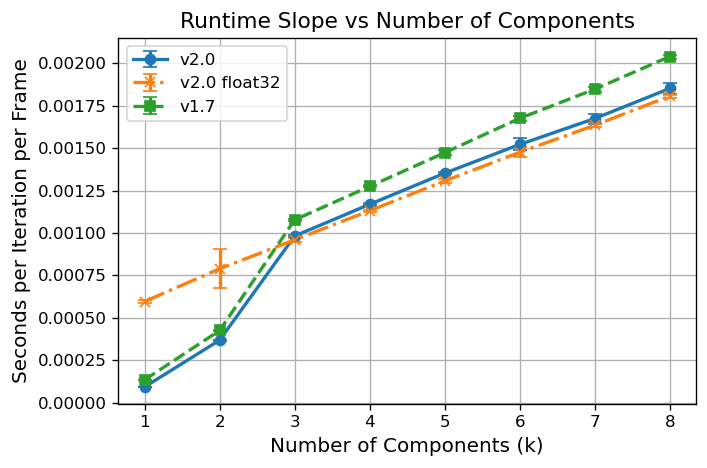

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=120)

plt.errorbar(
    n_components_list, slopes_v20, yerr=errors_v20,
    fmt='o-', label='v2.0', capsize=4, lw=2
)
plt.errorbar(
    n_components_list, slopes_v20_float32, yerr=errors_v20_float32,
    fmt='x-.', label='v2.0 float32', capsize=4, lw=2
)
plt.errorbar(
    n_components_list, slopes_v17, yerr=errors_v17,
    fmt='s--', label='v1.7', capsize=4, lw=2
)

plt.grid(True)
plt.xlabel("Number of Components (k)", fontsize=12)
plt.ylabel("Seconds per Iteration per Frame", fontsize=12)
plt.title("Runtime Slope vs Number of Components", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show();

In [27]:
percent_speedup = 100 * (slopes_v17 - slopes_v20) / slopes_v17
print(percent_speedup)

[33.61263667 11.69105781  5.29452308  5.56271055  5.20074265  5.98245904
  5.34869672  5.99153948]


# Kronecker

In [11]:
components = np.array([1,2,3,4,5,6,7,8])
n_frames = np.array([ 30520,  61041, 152604, 305209]) 
kron_new_float64 = np.empty((len(components),len(n_frames),2))
kron_new_float32 = np.empty((len(components),len(n_frames),2))
kron_old_float64 = np.empty((len(components),len(n_frames),2))
kron_old_float32 = np.empty((len(components),len(n_frames),2))
import os
path = "../kronecker/"
for i, component in enumerate(components):
    file_name = path + "float64/v2.0_timing_kronecker_torch.float64_" + str(component) + ".cpu.dat" 
    kron_new_float64[i] = np.loadtxt(file_name)[:,1:3]
    file_name = path + "float32/v2.0_timing_kronecker_torch.float32_" + str(component) + ".cpu.dat" 
    kron_new_float32[i] = np.loadtxt(file_name)[:,1:3]
    file_name = path + "float64_old/v1.7_timing_kronecker_torch.float64_" + str(component) + ".cpu.dat" 
    #kron_old_float64[i] = np.loadtxt(file_name)[:,1:3]
    file_name = path + "float32_old/v1.7_timing_kronecker_torch.float32_" + str(component) + ".cpu.dat" 
    kron_old_float32[i] = np.loadtxt(file_name)[:,1:3]

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_4518/1712725630.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(components))  # consistent colormap


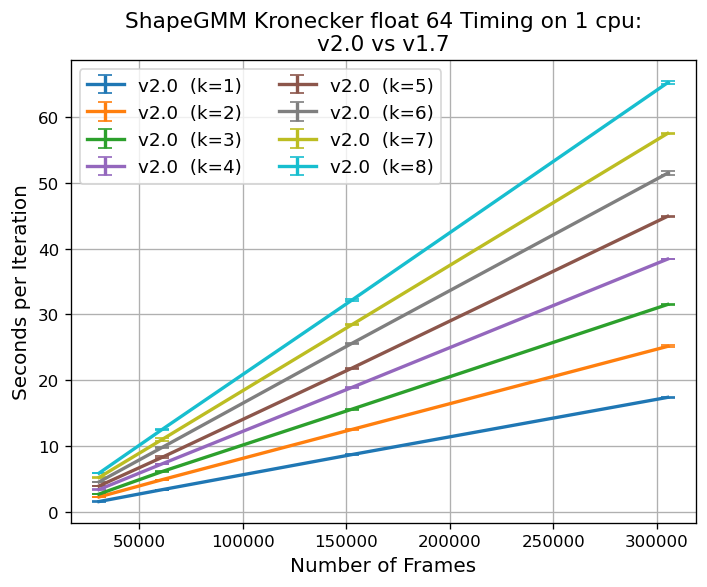

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# dummy inputs (replace with your real arrays)
# n_frames = np.array([...])
# uni_new_float64 = np.array([...])
# uni_old_float64 = np.array([...])
# components = list(range(1, 9))

fontsize = 12
colors = cm.get_cmap('tab10', len(components))  # consistent colormap

plt.figure(figsize=(6, 5), dpi=120)

for i, component in enumerate(components):
    c = colors(i)
    # v2.0: solid
    plt.errorbar(
        n_frames,
        kron_new_float64[i,:,0]/30,
        yerr=kron_new_float64[i,:,1]/30 ,
        label=f"v2.0  (k={component})",
        color=c,
        linestyle='-',
        linewidth=2,
        capsize=4
    )

    # v1.7: dashed
    #plt.errorbar(
    #    n_frames,
    #    kron_old_float64[i,:,0]/30,
    #    yerr=kron_old_float64[i,:,1]/30,
    #    label=f"v1.7  (k={component})",
    #    color=c,
    #    linestyle='--',
    #    linewidth=2,
    #    capsize=4
    #)

plt.grid(True)
plt.xlabel("Number of Frames", fontsize=fontsize)
plt.ylabel("Seconds per Iteration", fontsize=fontsize)
plt.title("ShapeGMM Kronecker float 64 Timing on 1 cpu:\nv2.0 vs v1.7", fontsize=fontsize+1)
plt.legend(fontsize=fontsize-1, loc='upper left', ncol=2)
plt.tight_layout()
plt.show();

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_4518/1705733672.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(components))  # consistent colormap


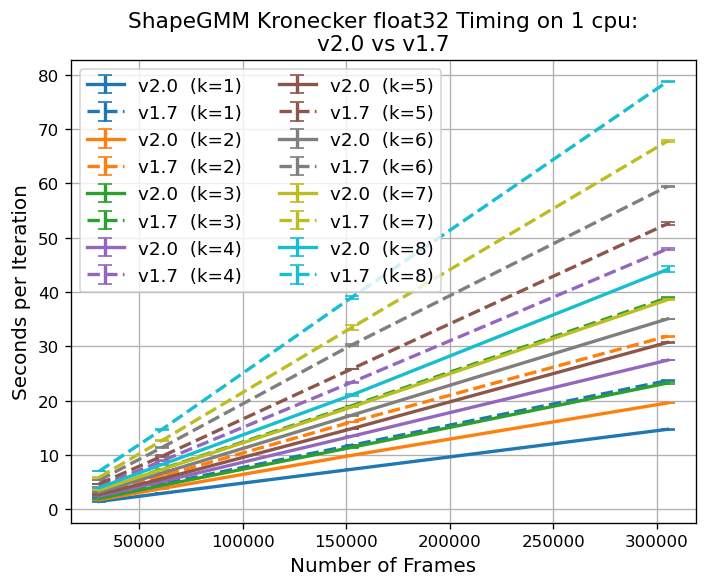

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# dummy inputs (replace with your real arrays)
# n_frames = np.array([...])
# uni_new_float64 = np.array([...])
# uni_old_float64 = np.array([...])
# components = list(range(1, 9))

fontsize = 12
colors = cm.get_cmap('tab10', len(components))  # consistent colormap

plt.figure(figsize=(6, 5), dpi=120)

for i, component in enumerate(components):
    c = colors(i)
    # v2.0: solid
    plt.errorbar(
        n_frames,
        kron_new_float32[i,:,0]/30,
        yerr=kron_new_float32[i,:,1]/30 ,
        label=f"v2.0  (k={component})",
        color=c,
        linestyle='-',
        linewidth=2,
        capsize=4
    )

    # v1.7: dashed
    plt.errorbar(
        n_frames,
        kron_old_float32[i,:,0]/30,
        yerr=kron_old_float32[i,:,1]/30,
        label=f"v1.7  (k={component})",
        color=c,
        linestyle='--',
        linewidth=2,
        capsize=4
    )

plt.grid(True)
plt.xlabel("Number of Frames", fontsize=fontsize)
plt.ylabel("Seconds per Iteration", fontsize=fontsize)
plt.title("ShapeGMM Kronecker float32 Timing on 1 cpu:\nv2.0 vs v1.7", fontsize=fontsize+1)
plt.legend(fontsize=fontsize-1, loc='upper left', ncol=2)
plt.tight_layout()
plt.show();

In [14]:
from scipy.stats import linregress
import numpy as np

n_components_list = np.array(components)
slopes_v20 = []
errors_v20 = []
slopes_v20_float32 = []
errors_v20_float32 = []
slopes_v17 = []
errors_v17 = []
slopes_v17_float32 = []
errors_v17_float32 = []

for i in range(len(n_components_list)):
    # Version 2.0
    y_v20 = kron_new_float64[i,:,0]
    slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v20)
    slopes_v20.append(slope)
    errors_v20.append(stderr)

    # Version 2.0 float32
    y_v20_float32 = kron_new_float32[i,:,0]
    slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v20_float32)
    slopes_v20_float32.append(slope)
    errors_v20_float32.append(stderr)
    
    # Version 1.7
    #y_v17 = kron_old_float64[i,:,0]
    #slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v17)
    #slopes_v17.append(slope)
    #errors_v17.append(stderr)

    # Version 1.7 float32
    y_v17 = kron_old_float32[i,:,0]
    slope, intercept, r_value, p_value, stderr = linregress(n_frames, y_v17)
    slopes_v17_float32.append(slope)
    errors_v17_float32.append(stderr)

slopes_v20 = np.array(slopes_v20)
errors_v20 = np.array(errors_v20)
slopes_v20_float32 = np.array(slopes_v20_float32)
errors_v20_float32 = np.array(errors_v20_float32)
#slopes_v17 = np.array(slopes_v17)
#errors_v17 = np.array(errors_v17)
slopes_v17_float32 = np.array(slopes_v17_float32)
errors_v17_float32 = np.array(errors_v17_float32)

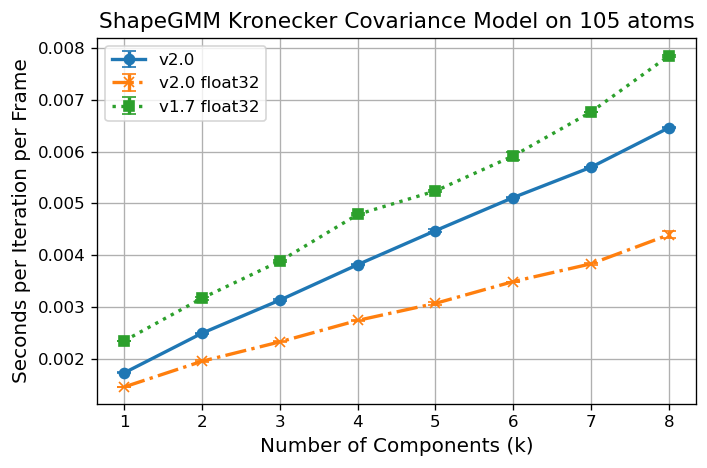

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=120)

plt.errorbar(
    n_components_list, slopes_v20, yerr=errors_v20,
    fmt='o-', label='v2.0', capsize=4, lw=2
)
plt.errorbar(
    n_components_list, slopes_v20_float32, yerr=errors_v20_float32,
    fmt='x-.', label='v2.0 float32', capsize=4, lw=2
)
#plt.errorbar(
#    n_components_list, slopes_v17, yerr=errors_v17,
#    fmt='s--', label='v1.7', capsize=4, lw=2
#)
plt.errorbar(
    n_components_list, slopes_v17_float32, yerr=errors_v17_float32,
    fmt='s:', label='v1.7 float32', capsize=4, lw=2
)

plt.grid(True)
plt.xlabel("Number of Components (k)", fontsize=12)
plt.ylabel("Seconds per Iteration per Frame", fontsize=12)
plt.title("ShapeGMM Kronecker Covariance Model on 105 atoms", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show();

In [16]:
#percent_speedup = 100 * (slopes_v17 - slopes_v20) / slopes_v17
#print(percent_speedup)
percent_speedup = 100 * (slopes_v17_float32 - slopes_v20_float32) / slopes_v17_float32
print(percent_speedup)

[38.07968671 38.52933651 40.1823873  42.80967297 41.48864843 41.05409527
 43.38472814 44.06685823]
